**Mart SALES PREDICTION**

![Super Market](https://www.supermarketnews.com/sites/supermarketnews.com/files/styles/article_featured_standard/public/Farmstead-2promo_0.gif?itok=LBoG0Kn8)

**Understanding Data**

* Item Identifier: A code provided for the item of sale
* Item Weight: Weight of item
* Item Fat Content: A categorical column of how much fat is present in the item : ‘Low Fat’, ‘Regular’, ‘low fat’, ‘LF’, ‘reg’
* Item Visibility: Numeric value for how visible the item is
* Item Type: What category does the item belong to: ‘Dairy’, ‘Soft Drinks’, ‘Meat’, ‘Fruits and Vegetables’, ‘Household’, ‘Baking Goods’, ‘Snack Foods’, ‘Frozen Foods’, ‘Breakfast’, ’Health and Hygiene’, ‘Hard Drinks’, ‘Canned’, ‘Breads’, ‘Starchy Foods’, ‘Others’, ‘Seafood’.
* Item MRP: The MRP price of item
* Outlet Identifier: Which outlet was the item sold. This will be categorical column
* Outlet Establishment Year: Which year was the outlet established
* Outlet Size: A categorical column to explain size of outlet: ‘Medium’, ‘High’, ‘Small’.
* Outlet Location Type: A categorical column to describe the location of the outlet: ‘Tier 1’, ‘Tier 2’, ‘Tier 3’
* Outlet Type : Categorical column for type of outlet: ‘Supermarket Type1’, ‘Supermarket Type2’, ‘Supermarket Type3’, ‘Grocery Store’
* Item Outlet Sales: The amount of sales for an item.

**Loading Libraries **

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet, Lasso, RidgeCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

import xgboost as xgb
import lightgbm as lgb

from math import sqrt

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Train.csv', 'Test.csv']


**Read  the Data**

In [2]:
data_train = pd.read_csv("../input/Train.csv")
data_test = pd.read_csv("../input/Test.csv")

**Let see some data..**

In [3]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


**Data from Eagle's Eye**

In [5]:
print("Training Data  Row : %s Column : %s " % (str(data_train.shape[0]) ,str(data_train.shape[1])))

Training Data  Row : 8523 Column : 12 


In [6]:
print("Training Data  Row : %s Column : %s " % (str(data_test.shape[0]) ,str(data_test.shape[1])))

Training Data  Row : 5681 Column : 11 


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


> **DATA CLEANUP - Null Data**

In [9]:
data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

**Observations** - Item Weight and Outlet Size has missing values both in training and test dataset

**Let's replace **
* "Item Weight" null values with mean values of "Item Weight"
* "Outlet_Size" with Small as most of the null values are ( Tier 3 ,Grocery Store or Tier 2 ,Supermarket Type1) where most of the values are small.


In [11]:
data_train['Item_Weight'] = data_train['Item_Weight'].fillna((data_train['Item_Weight'].mean()))
data_train.Outlet_Size = data_train.Outlet_Size.fillna("Small")
data_train.isnull().sum().sum()

0

In [12]:
data_test['Item_Weight'] = data_test['Item_Weight'].fillna((data_test['Item_Weight'].mean()))
data_test.Outlet_Size = data_test.Outlet_Size.fillna("Small")
data_test.isnull().sum().sum()

0

**Divide the data in Categorical and Numerial Data**

In [13]:
column_num = data_train.select_dtypes(exclude = ["object"]).columns
column_object = data_train.select_dtypes(include = ["object"]).columns

test_column_num = data_test.select_dtypes(exclude = ["object"]).columns
test_column_object = data_test.select_dtypes(include = ["object"]).columns

In [14]:
data_train_num = data_train[column_num]
data_train_object = data_train[column_object]

data_test_num = data_test[test_column_num]
data_test_object = data_test[test_column_object]

**Overview Stats About Data**

In [15]:
data_train_num.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
data_train_object.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Small,Tier 3,Supermarket Type1
freq,10,5089,1232,935,4798,3350,5577


**Univariate Analysis**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


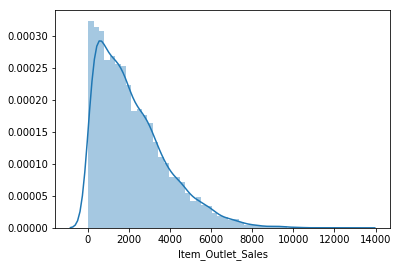

In [17]:
sns.distplot(data_train_num["Item_Outlet_Sales"]);

In [18]:
print("Skewness: %f" % data_train_num["Item_Outlet_Sales"].skew())
print("Kurtosis: %f" % data_train_num["Item_Outlet_Sales"].kurt())

Skewness: 1.177531
Kurtosis: 1.615877


**Observation** - Target Data is positively skewed

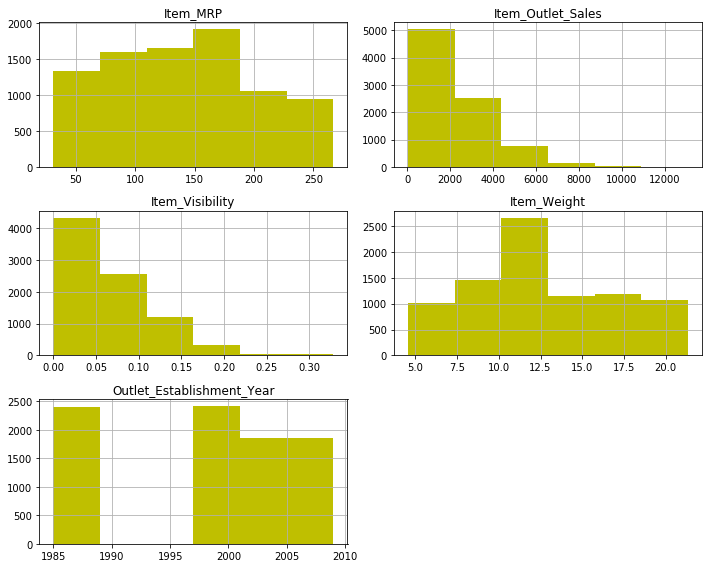

In [19]:
%matplotlib inline
data_train_num.hist(figsize=(10,8),bins=6,color='Y')
plt.tight_layout()
plt.show()

**Observation** -
*  Most of the MRP is in Range  100 to 180
*  Around 5000 Item Outlet sale is in between 0 to 2000
*  Around 2500 items have a weight 10 to 12.5
*  Most of the Item visibilty is between 0 to 0.05


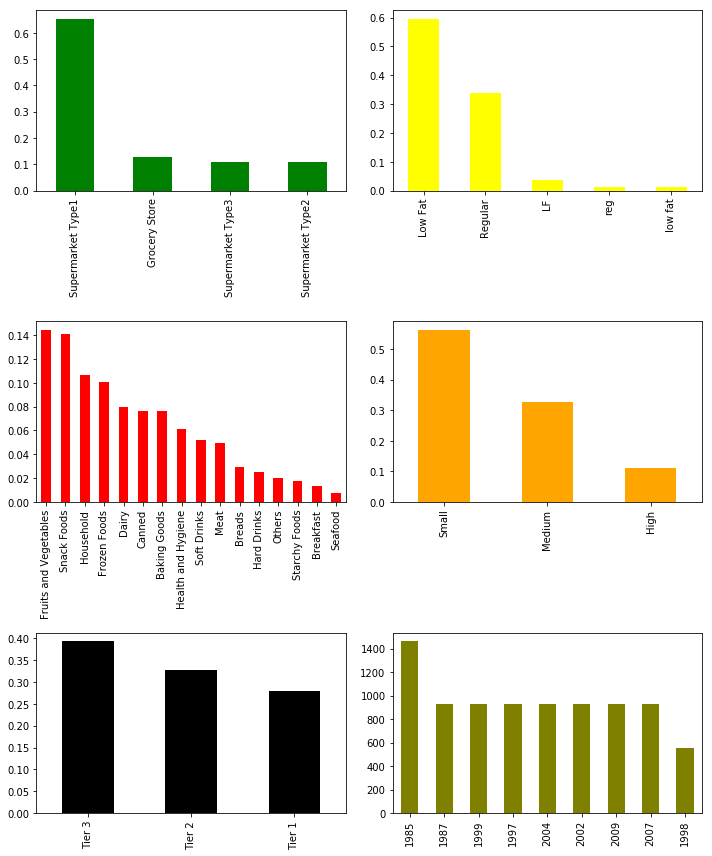

In [20]:
plt.figure(1)
plt.subplot(321)
data_train['Outlet_Type'].value_counts(normalize=True).plot(figsize=(10,12),kind='bar',color='green')

plt.subplot(322)
data_train['Item_Fat_Content'].value_counts(normalize=True).plot(figsize=(10,12),kind='bar',color='yellow')

plt.subplot(323)
data_train['Item_Type'].value_counts(normalize=True).plot(figsize=(10,12),kind='bar',color='red')

plt.subplot(324)
data_train['Outlet_Size'].value_counts(normalize=True).plot(figsize=(10,12),kind='bar',color='orange')

plt.subplot(325)
data_train['Outlet_Location_Type'].value_counts(normalize=True).plot(figsize=(10,12),kind='bar',color='black')

plt.subplot(326)
data_train['Outlet_Establishment_Year'].value_counts().plot(figsize=(10,12),kind='bar',color='olive')


plt.tight_layout()
plt.show()

**Observation** -
* More than 65 % Outlet  type is  SuperMarket Type 1 
*  Item Fat Content same category has multiple names i.e "Low fat" as "LF", "low fat" ; "Regular" as reg (require to be merge in single name)
* Most of Item are from category Fruits and Vegetables and Snacks Foods
* More than 55 % outlet are of small size
* More than 40 % Outlet are in tier 3 location followed by Tier2
* Highest Outlet Opened in year 1985 more than 1400

**Based on above observation merge "Item Fat Content " Category**

In [21]:
data_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
data_test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [23]:
vals_to_replace = {'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}
data_train['Item_Fat_Content'] = data_train['Item_Fat_Content'].map(vals_to_replace)
data_test['Item_Fat_Content'] = data_test['Item_Fat_Content'].map(vals_to_replace)

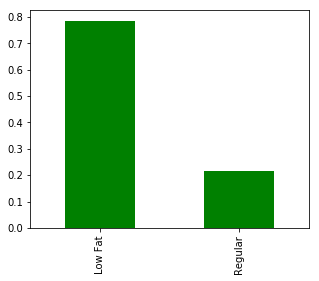

In [24]:
data_train['Item_Fat_Content'].value_counts(normalize=True).plot(figsize=(5,4),kind='bar',color='green')

**Observation** - after changes we can infer around 75 %  of the items in Mart are Low Fat

In [25]:
data_train["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

**BIVARIATE ANALYSIS**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


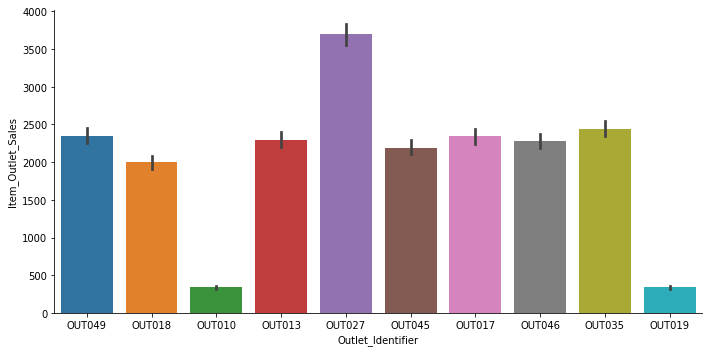

In [26]:

ax = sns.catplot(x="Outlet_Identifier", y = "Item_Outlet_Sales", data=data_train, height=5, aspect=2,  kind="bar")


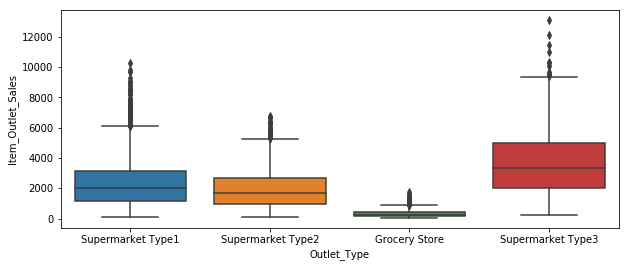

In [27]:
plt.rcParams['figure.figsize']=(10,4)
ax = sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", data=data_train)


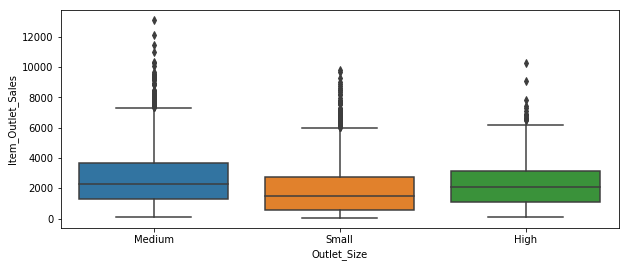

In [28]:
ax = sns.boxplot(x="Outlet_Size", y="Item_Outlet_Sales", data=data_train)

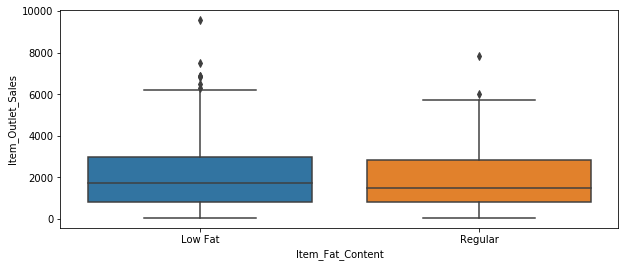

In [29]:
ax = sns.boxplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data=data_train)

**Observation** -
*  Item Outet sale is maximum in Oultlet Identifier OUT027 more than 3500
*  SuperMarket Type 3 has maximum   Item Outet sale whereas Grocery Store has lowest
*  Medium size Outlet are having most outlet sale are having potentail outlier to convert it to High size Outlet.
*  "Low fat" Items are having more Item outlet Sale



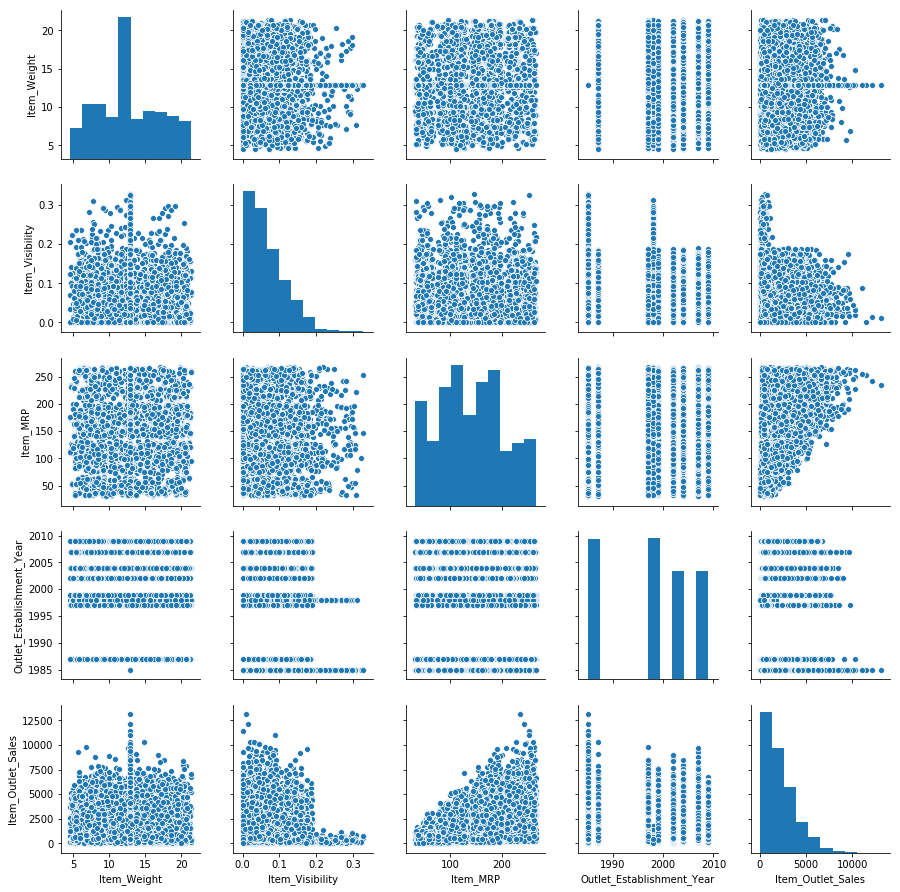

In [30]:
sns.pairplot(data_train[data_train_num.columns])

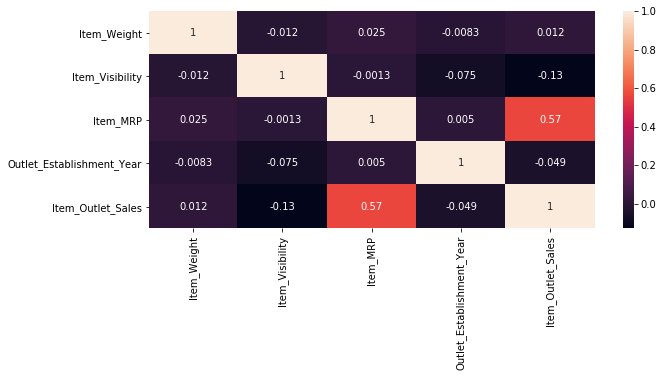

In [31]:
sns.heatmap(data_train[data_train_num.columns].corr(),annot=True)



**Observation** -
* Item Outlet Sale show mild possitive corelation with Item MRP
* Item Outlet Sale show negative corelation with Item visibility

**PRE PROCESSING DATA**

**One-hot Encoding** -  Converting the Categorical values to numerical 

In [32]:
total_object = data_train_object.append(data_test_object)
train_object_lenght = len(data_train_object)
total_cat = pd.get_dummies(total_object, drop_first= True)
data_train_object = total_cat[:train_object_lenght]
data_test_object = total_cat[train_object_lenght:]

In [33]:
data_train_object.head()

,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC24,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49,Item_Identifier_DRD60,Item_Identifier_DRE01,Item_Identifier_DRE03,Item_Identifier_DRE12,Item_Identifier_DRE13,Item_Identifier_DRE15,Item_Identifier_DRE25,Item_Identifier_DRE27,Item_Identifier_DRE37,Item_Identifier_DRE48,Item_Identifier_DRE49,Item_Identifier_DRE60,Item_Identifier_DRF01,Item_Identifier_DRF03,Item_Identifier_DRF13,Item_Identifier_DRF15,...,Item_Identifier_NCZ30,Item_Identifier_NCZ41,Item_Identifier_NCZ42,Item_Identifier_NCZ53,Item_Identifier_NCZ54,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


combining one hot encoded data to numerical data

In [34]:
df_test = pd.concat([data_test_object,data_test_num],axis=1)
df_train = pd.concat([data_train_object,data_train_num],axis=1)
df_train.head()

,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC24,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49,Item_Identifier_DRD60,Item_Identifier_DRE01,Item_Identifier_DRE03,Item_Identifier_DRE12,Item_Identifier_DRE13,Item_Identifier_DRE15,Item_Identifier_DRE25,Item_Identifier_DRE27,Item_Identifier_DRE37,Item_Identifier_DRE48,Item_Identifier_DRE49,Item_Identifier_DRE60,Item_Identifier_DRF01,Item_Identifier_DRF03,Item_Identifier_DRF13,Item_Identifier_DRF15,...,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,9.30,0.016047,249.8092,1999,3735.1380
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,5.92,0.019278,48.2692,2009,443.4228
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,17.50,0.016760,141.6180,1999,2097.2700
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,19.20,0.000000,182.0950,1998,732.3800
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,8.93,0.000000,53.8614,1987,994.7052


Dividing Data to Dependent and Independent Variable

In [35]:
train_Y = df_train.iloc[:,-1]
train_X=  df_train.iloc[:,0:-1]

**Scaling Data**

In [36]:

scaler = StandardScaler()
train_scaler = scaler.fit(train_X)
train_scale = train_scaler.transform(train_X)
train_X = pd.DataFrame(train_scale, columns=train_X.columns)

train_scale = train_scaler.transform(df_test)
df_test = pd.DataFrame(train_scale, columns=df_test.columns)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


**Spliting the Data**

In [37]:
X1_train, X1_test, Y1_train,Y1_test =  train_test_split(train_X,train_Y, random_state=33)
print(X1_train.shape)
print(X1_test.shape)
print(df_test.shape)

(6392, 1597)
(2131, 1597)
(5681, 1597)


**Principal component Analysis**

In [38]:
pca_model = PCA(n_components=0.95)
X1_train = pca_model.fit_transform(X1_train)
X1_test = pca_model.transform(X1_test)
test_X = pca_model.transform(df_test)
print(X1_train.shape)
print(X1_test.shape)
print(test_X.shape)

(6392, 1415)
(2131, 1415)
(5681, 1415)


![Sales Prediction](https://www.inecom.com.au/wp-content/uploads/2017/06/planning.jpg)

**Predictions**

In [39]:
def modelPredection(model,X1_train,Y1_train,X1_test,Y1_test,test_X) :
    model.fit(X1_train,Y1_train)
    Y1_predict = model.predict(X1_test)
    print("RMSE : %f"%sqrt(mean_squared_error(Y1_test,Y1_predict)))
    return model.predict(test_X)

In [40]:
#Linear Regression
linear = linear_model.LinearRegression( fit_intercept=True, n_jobs=None,
         normalize=False);
predict_Y = modelPredection(linear,X1_train,Y1_train,X1_test,Y1_test,test_X)

RMSE : 1334.306932


In [41]:
#RidgeCV
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X1_train,Y1_train)

predict_Y = modelPredection(clf,X1_train,Y1_train,X1_test,Y1_test,test_X)

RMSE : 1334.268390


In [42]:
#Kernel Ridge
RR = KernelRidge(alpha=0.6, kernel='polynomial', degree=3, coef0=2.5)
predict_Y = modelPredection(RR,X1_train,Y1_train,X1_test,Y1_test,test_X)

RMSE : 1263.471722


In [43]:
#Lasso
#lasso = Lasso(alpha =1.1, random_state=1)
lasso = Lasso(alpha =16, random_state=100)
predict_Y = modelPredection(lasso,X1_train,Y1_train,X1_test,Y1_test,test_X)

RMSE : 1256.318428


In [44]:
#Elastic Net 
#elastic_net = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
elastic_net = ElasticNet(alpha=0.8)
predict_Y = modelPredection(elastic_net,X1_train,Y1_train,X1_test,Y1_test,test_X)

RMSE : 1296.232087


In [45]:
#Gradient Boosting
#GBR = GradientBoostingRegressor(n_estimators=30, max_depth=2)
GBR = GradientBoostingRegressor()
predict_Y = modelPredection(GBR,X1_train,Y1_train,X1_test,Y1_test,test_X)

RMSE : 1199.616015


In [46]:
#XGB
model_xgb = xgb.XGBRegressor()
predict_Y = modelPredection(model_xgb,X1_train,Y1_train,X1_test,Y1_test,test_X)

RMSE : 1195.565988


In [47]:
#light Gradient Boosting
model_lgb = lgb.LGBMRegressor()
predict_Y = modelPredection(model_lgb,X1_train,Y1_train,X1_test,Y1_test,test_X)

RMSE : 1184.469221


From the prediction you can conclude that XG Boost is gIving better predective model. we can further fine tune the models for increased performance. 
But this is good to go for beginner model.

please let me know you feedbacks and comments and boost my motivation by **Upvote.**

![](http://www.animatedimages.org/data/media/466/animated-thank-you-image-0078.gif)